In [1]:
from Chemometrics.import_common import *
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = 'SimHei'

In [3]:
with open('./data/洋河常规优级GC.csv') as csv:
    df = pd.read_csv(csv,delimiter='\t')

In [4]:
cp = pd.read_excel('./data/洋河常规GC_共有模式.xlsx')

In [5]:
cp['共有峰序号'].tail()
cp1 = df.loc[0]
X_ = df.iloc[1:,:-1]

In [19]:
X_.head()
X = X_.loc[:,'1':]
X = X.loc[:,cp['频率'].values>.02]

In [69]:
cls = df['分类名称'][1:]
y = df['分类编号'][1:]
y.loc[y=='3']='1'
y.loc[y=='4']='2'

In [28]:
#psave(dict(X=X,y=y,df=df,cp=cp),'./data/洋河常规GC.p')

In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
dt = DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=2, random_state=1)
cv = StratifiedKFold(n_splits=3, random_state=1)
param_grid={'min_samples_leaf':range(2,5)}
grid = GridSearchCV(dt, param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [95]:
# evaluate model
grid.score(X_train,y_train)
cls_n = ['优','优降一']

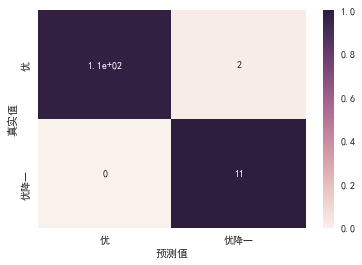

In [97]:
#train set
preds_train = grid.predict(X_train)
cm = confusion_matrix(y_train,preds_train)
plot_ConfusionMatrix(cm,cls_n)

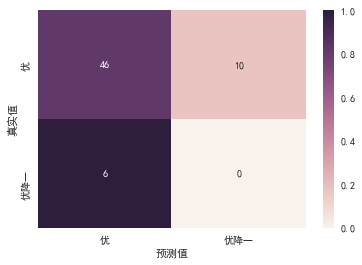

In [96]:
#test set
preds_test = grid.predict(X_test)
cm_test = confusion_matrix(y_test,preds_test)
plot_ConfusionMatrix(cm_test,cls_n)